# "Data Visualization with Pandas, Matplotlib, Seaborn, and Colorful Themes"
## Importing nesessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
# loading the dataset CSV file.
df = pd.read_csv('income_evaluation.csv')
df.head() #loads by default first 5 lines from dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Preprocessing

In [3]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

 workclass          9
 education         16
 marital-status     7
 occupation        15
 relationship       6
 race               5
 sex                2
 native-country    42
 income             2
dtype: int64

In [4]:
df[' workclass'].unique() #checks the unique value in workclass column of dataframe

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [5]:
df[' education'].unique()  #checks the unique value in education column of dataframe

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [6]:
def segment_education(education):   # User define function to transform education column
    if education.strip() == 'Bachelors' or education.strip() == 'Assoc' or education.strip() == 'Masters' or education.strip() == 'Doctorate' or education.strip() == 'Prof-school':
        return 'Higher Education'
    elif education.strip() == 'HS-grad' or education.strip() == 'Some-college':
        return 'High School or Some College'
    elif '9th' in education or '10th' in education or '11th' in education or '12th' in education:
        return 'High School Dropout'
    elif '7th-8th' in education or '5th-6th' in education or '1st-4th' in education or 'Preschool' in education:
        return 'School Dropout'
    else:
        return 'Other'

df[' education'] = df[' education'].apply(segment_education)

In [7]:
df[' education'].unique() #result after transformation

array(['Higher Education', 'High School or Some College',
       'High School Dropout', 'Other', 'School Dropout'], dtype=object)

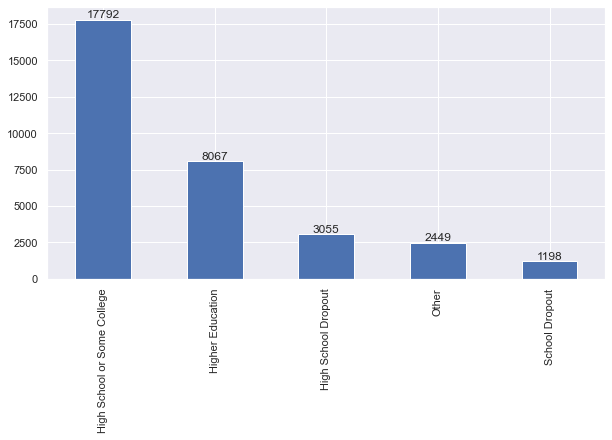

In [8]:
plt.figure(figsize=(10, 5))
education_counts = df[' education'].value_counts()

# Plotting the bar chart for education
education_counts.plot(kind='bar')

# Adding value labels to the bars
for i, count in enumerate(education_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

In [9]:
df[' occupation'].unique()     #checks the unique value in occupation column of dataframe

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
def segment_occupation(occupation):    # User define function to transform occupation column
    if occupation.strip() in ['Adm-clerical', 'Exec-managerial']:
        return 'Administrative/Managerial'
    elif occupation.strip() in ['Handlers-cleaners', 'Other-service', 'Priv-house-serv']:
        return 'Service'
    elif occupation.strip() in ['Prof-specialty', 'Tech-support']:
        return 'Professional/Technical'
    elif occupation.strip() in ['Sales']:
        return 'Sales'
    elif occupation.strip() in ['Craft-repair', 'Machine-op-inspct', 'Transport-moving']:
        return 'Skilled Labor'
    elif occupation.strip() in ['Farming-fishing']:
        return 'Farming/Fishing'
    elif occupation.strip() in ['?', 'Armed-Forces']:
        return 'Unknown/Military'
    elif occupation.strip() in ['Protective-serv']:
        return 'Protective Services'
    else:
        return 'Other'
    
df[' occupation'] = df[' occupation'].apply(segment_occupation)

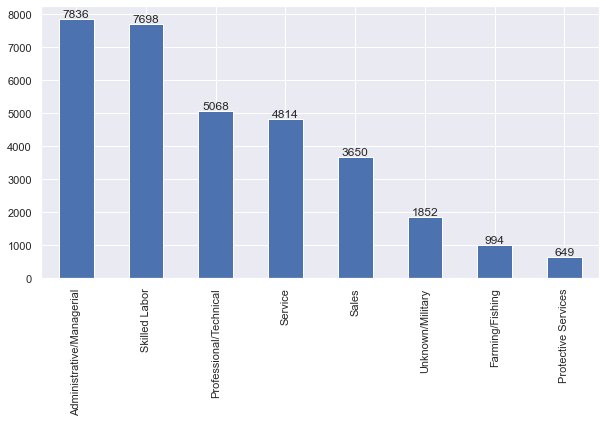

In [11]:
plt.figure(figsize=(10, 5))
occupation_counts = df[' occupation'].value_counts()

# Plotting the bar chart
occupation_counts.plot(kind='bar')

# Adding value labels to the bars
for i, count in enumerate(occupation_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

In [12]:
df[' marital-status'].unique()      #checks the unique value in marital-status column of dataframe

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [13]:
df[' relationship'].unique()       #checks the unique value in relationship column of dataframe

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [14]:
df[' race'].unique()       #  #checks the unique value in race column of dataframe

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [15]:
df[' sex'].unique()       #  #checks the unique value in sex column of dataframe

array([' Male', ' Female'], dtype=object)

In [16]:
df[' native-country'].unique()   #  #checks the unique value in native-country column of dataframe

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [17]:
def segment_native_country(country):
    if country.strip() in ['United-States', 'Canada']:
        return 'North America'
    elif country.strip() in ['Mexico', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Puerto-Rico', 'Honduras', 'El-Salvador', 'Guatemala', 'Nicaragua', 'Haiti']:
        return 'Central America/Caribbean'
    elif country.strip() in ['Germany', 'England', 'France', 'Italy', 'Poland', 'Scotland', 'Greece', 'Ireland', 'Hungary', 'Holand-Netherlands']:
        return 'Europe'
    elif country.strip() in ['India', 'China', 'Japan', 'Taiwan', 'Iran']:
        return 'Asia'
    elif country.strip() in ['Cambodia', 'Thailand', 'Laos', 'Philippines', 'Vietnam']:
        return 'Southeast Asia'
    elif country.strip() in ['Yugoslavia', 'Greece']:
        return 'Balkans'
    elif country.strip() in ['Outlying-US(Guam-USVI-etc)']:
        return 'US Territories'
    else:
        return 'Other'

df[' native-country'] = df[' native-country'].apply(segment_native_country)

In [18]:
df[' native-country'].unique()  #unique values after transformation.

array(['North America', 'Central America/Caribbean', 'Asia', 'Other',
       'Europe', 'Southeast Asia', 'Balkans', 'US Territories'],
      dtype=object)

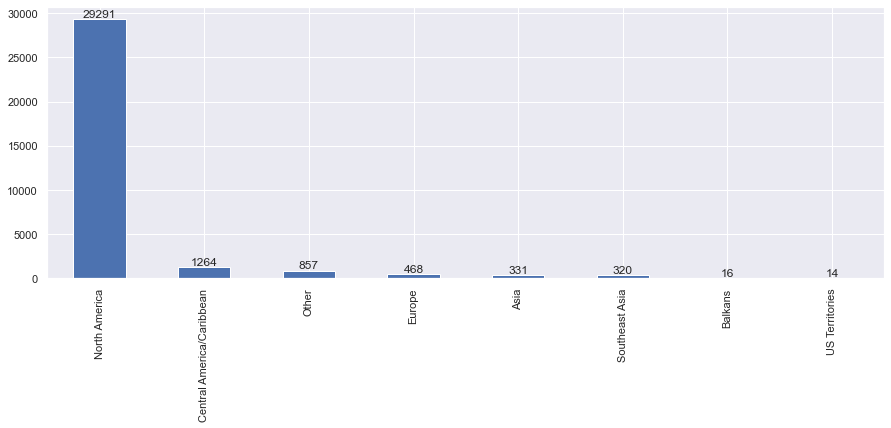

In [19]:
plt.figure(figsize=(15, 5))
native_country_counts = df[' native-country'].value_counts()

# Plotting the bar chart
native_country_counts.plot(kind='bar')

# Adding value labels to the bars
for i, count in enumerate(native_country_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

In [20]:
df[' income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [21]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

 workclass         9
 education         5
 marital-status    7
 occupation        8
 relationship      6
 race              5
 sex               2
 native-country    8
 income            2
dtype: int64

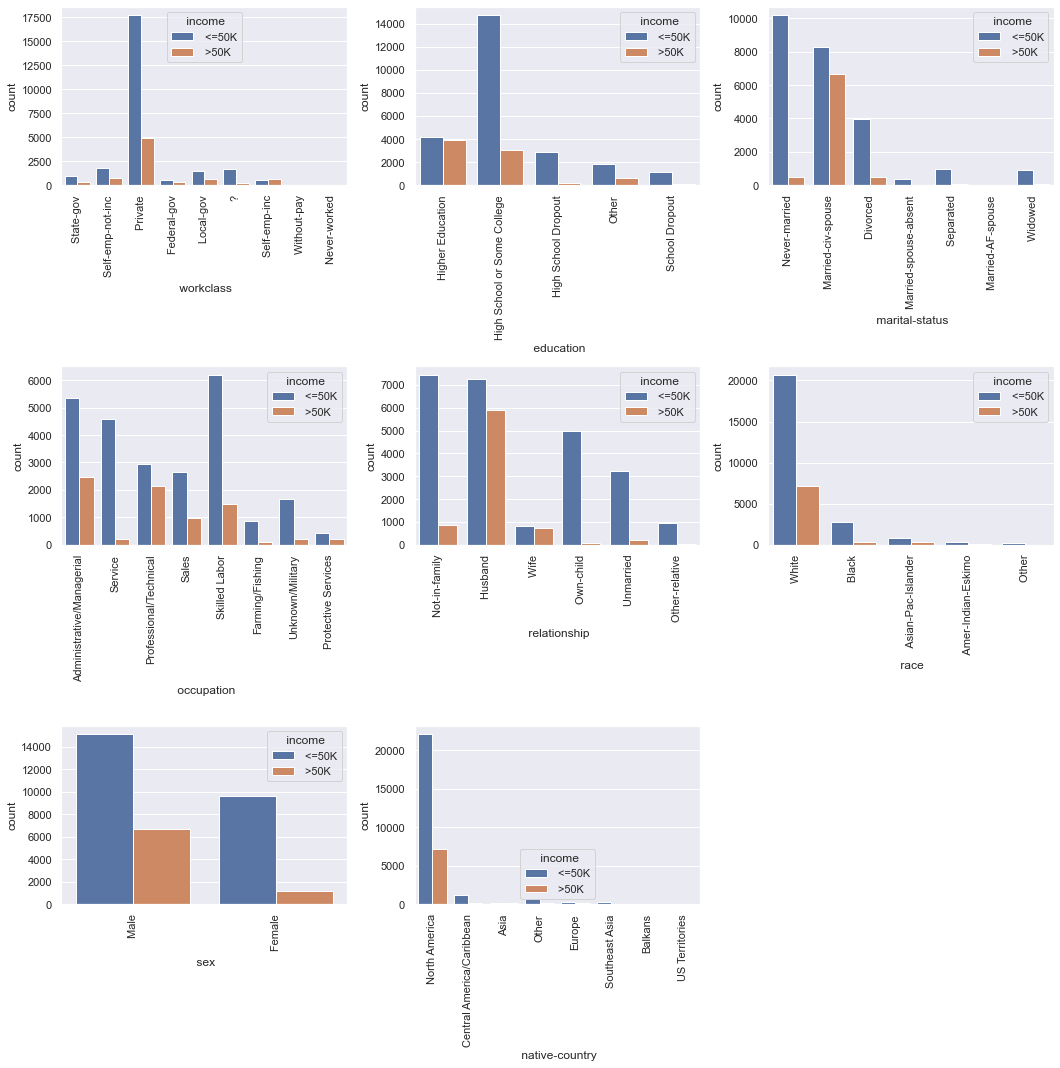

In [22]:
# list of categorical variables to plot
cat_vars = [' workclass', ' education', ' marital-status', ' occupation', ' relationship',
            ' race', ' sex', ' native-country']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue=' income', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

# show plot
plt.show()

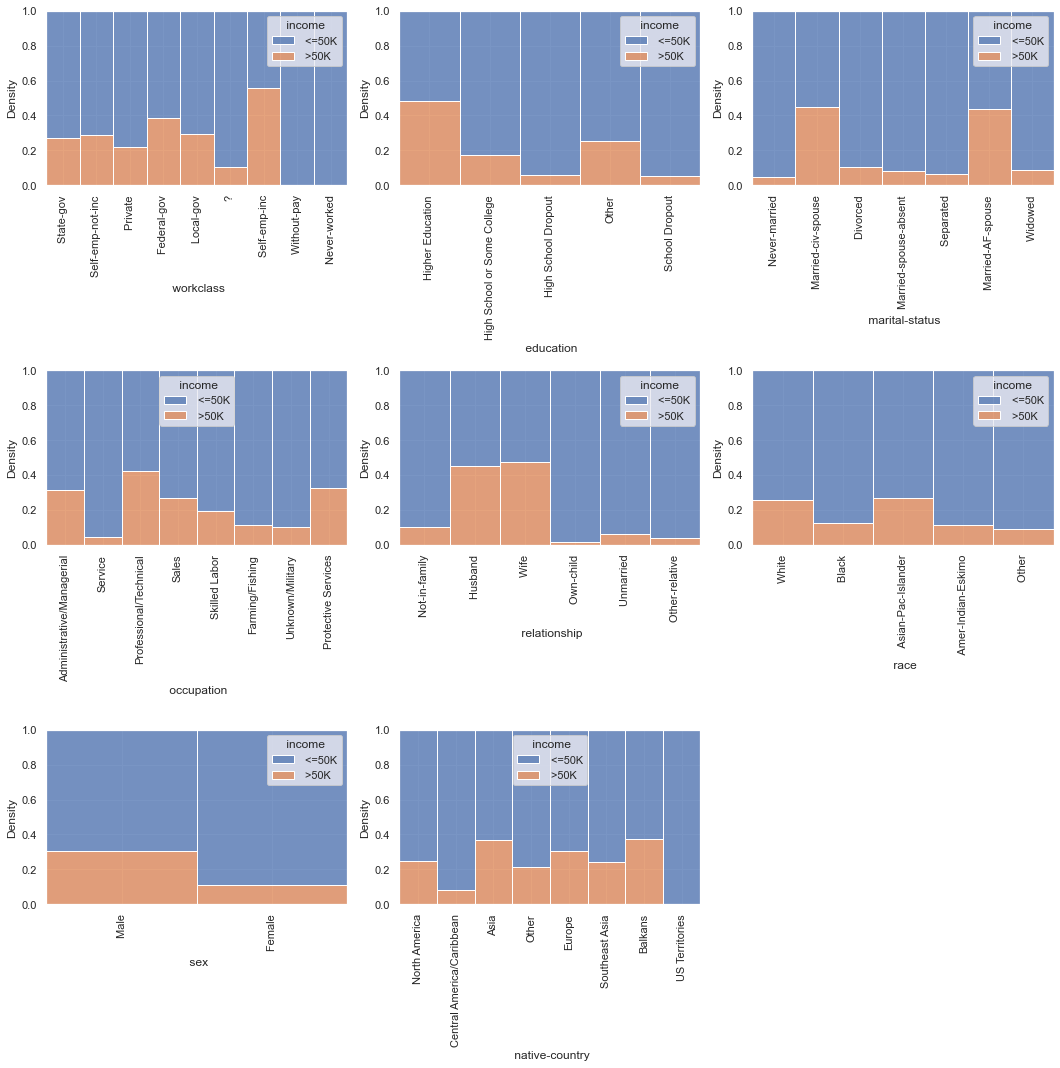

In [23]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = [' workclass', ' education', ' marital-status', ' occupation', ' relationship',
            ' race', ' sex', ' native-country']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue=' income', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

# show plot
plt.show()

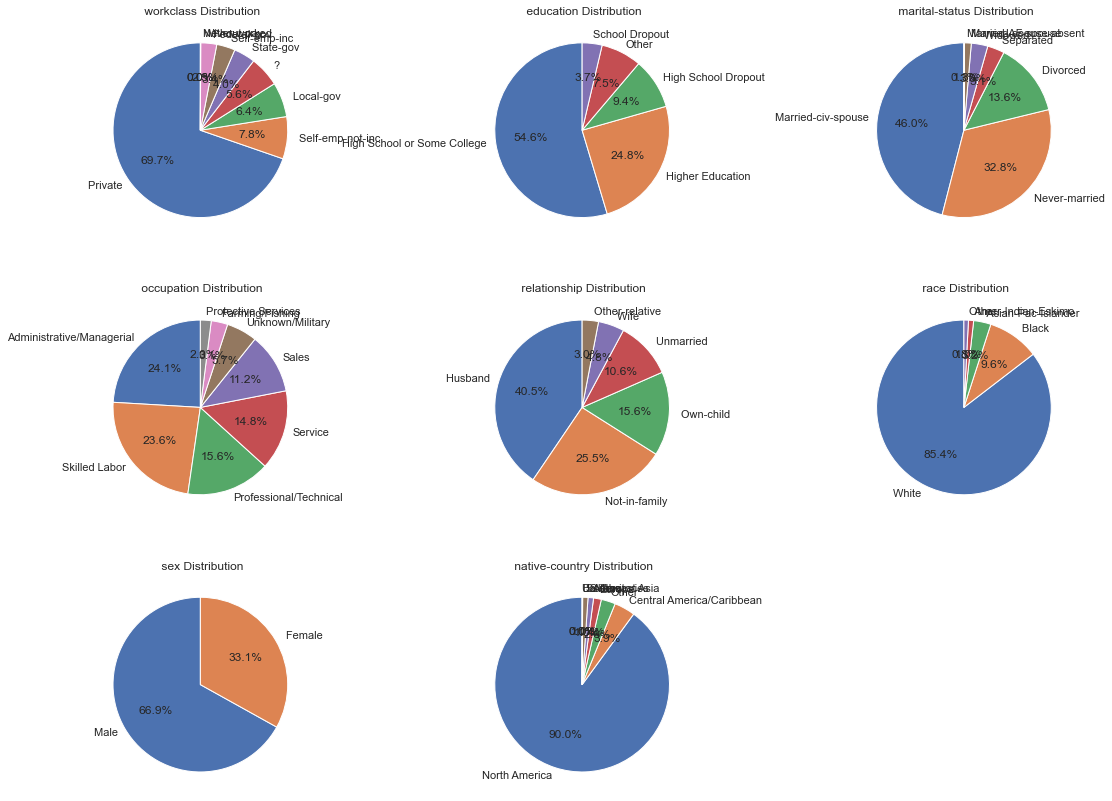

In [24]:
cat_vars = [' workclass', ' education', ' marital-status', ' occupation', ' relationship',
            ' race', ' sex', ' native-country']
#cat_vars = [' sex', ' education', ' occupation', ' race']
# create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# remove the ninth subplot
# Remove the ninth subplot
axs[-1, -1].remove()

# show the plot
plt.show()

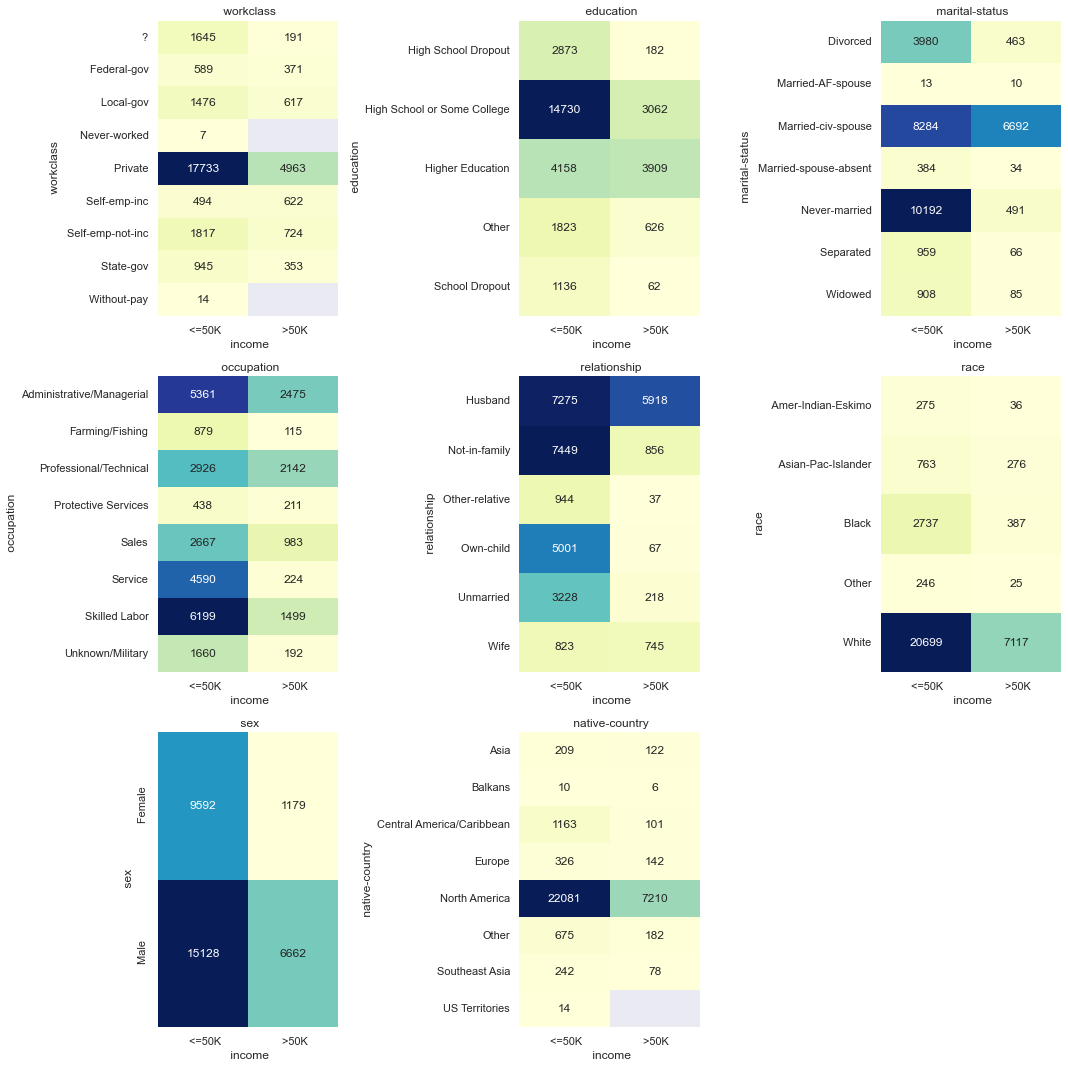

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables to plot
cat_vars = [' workclass', ' education', ' marital-status', ' occupation', ' relationship',
            ' race', ' sex', ' native-country']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# Create a frequency table for each categorical variable
freq_tables = []
for var in cat_vars:
    freq_table = df.groupby([var, ' income']).size().unstack()
    freq_tables.append(freq_table)

# Create heatmaps for each categorical variable
for i, freq_table in enumerate(freq_tables):
    sns.heatmap(freq_table, annot=True, fmt=".0f", cmap="YlGnBu", ax=axs[i], cbar=False)
    axs[i].set_title(cat_vars[i])

# Remove the ninth subplot
fig.delaxes(axs[8])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


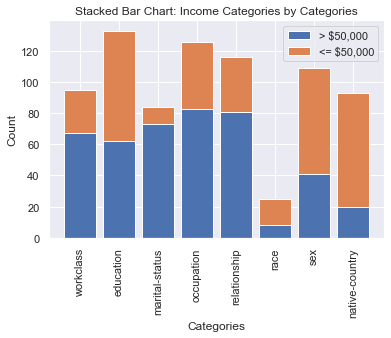

In [26]:
'''The code generates a stacked bar chart 
    to visualize the distribution of income categories within different categories.'''

# Define the categories and income groups
categories = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
income_groups = ['> $50,000', '<= $50,000']

# Generate random data (replace with your actual data)
data = np.random.randint(0, 100, size=(len(categories), len(income_groups)))

# Create the stacked bar chart
fig, ax = plt.subplots()

# Iterate over each income group
for i, group in enumerate(income_groups):
    # Calculate the bottom position for each category
    bottom = np.sum(data[:, :i], axis=1)
    # Plot the stacked bars
    ax.bar(categories, data[:, i], bottom=bottom, label=group)

# Add labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart: Income Categories by Categories')

# Add a legend
ax.legend()

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()


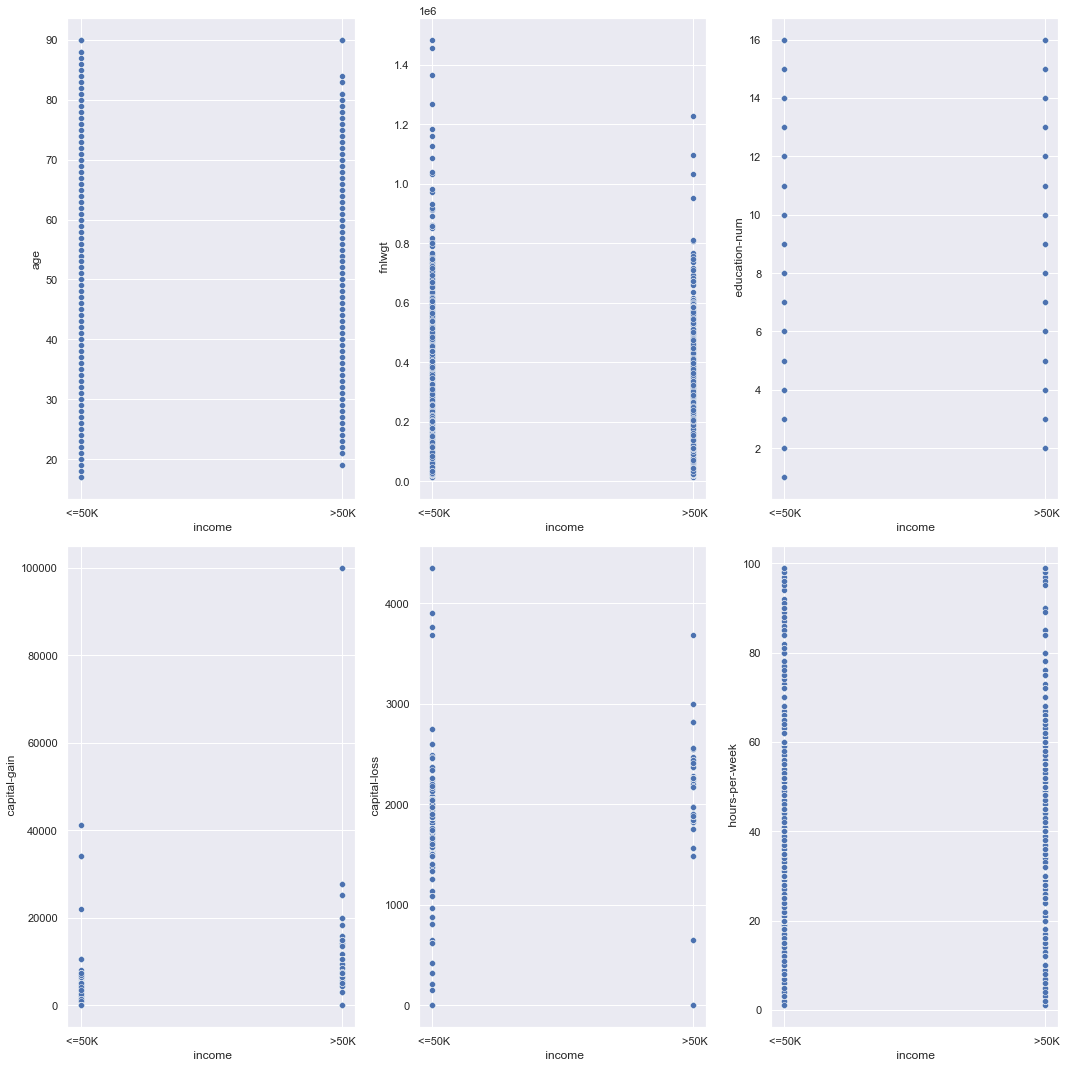

In [30]:
'''This code creates a figure with a 2x3 grid of subplots using plt.subplots().
    It then flattens the axs array for easier iteration. The for loop iterates over 
    the numerical_cols list, and for each variable, it creates a scatter plot using sns.scatterplot(). 
    The 'income' variable is plotted on the x-axis using x='income', and the respective numerical variable
    from numerical_cols is plotted on the y-axis using y=var. The resulting scatter plots 
    are displayed using plt.show().'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your data into a DataFrame called 'df'
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

for i, var in enumerate(numerical_cols):
    sns.scatterplot(x=' income', y=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

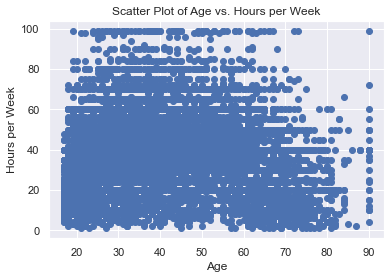

In [32]:
'''This code uses DataFrame named df with the columns 'age' and 'hours-per-week'
    containing the respective data. It uses plt.scatter() to create a scatter plot, 
    with 'age' values on the x-axis and 'hours-per-week' values on the y-axis. 
    The plt.xlabel(), plt.ylabel(), and plt.title() functions are used to set the x-axis label, 
    y-axis label, and plot title, respectively.'''

import pandas as pd
import matplotlib.pyplot as plt

x = df['age']
y = df[' hours-per-week']
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Scatter Plot of Age vs. Hours per Week')
plt.show()

In [33]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print(numerical_cols)

['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


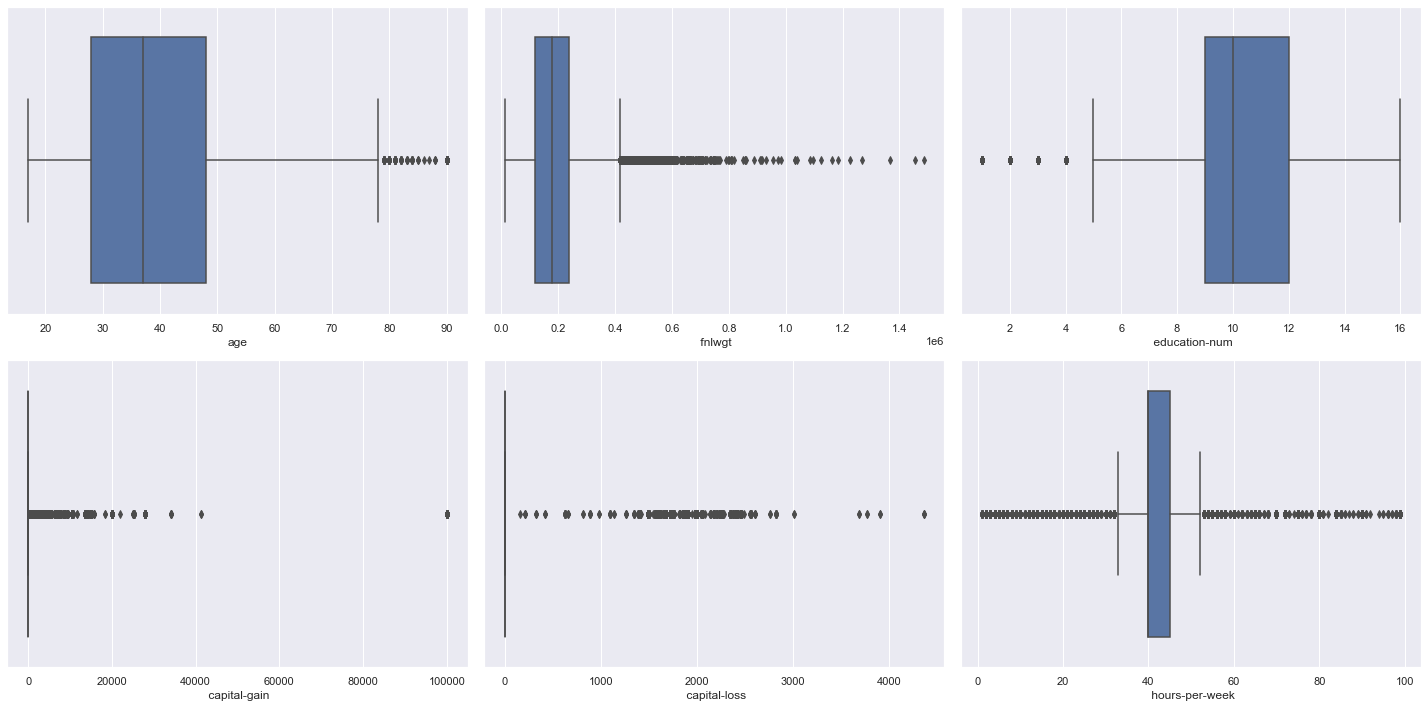

In [34]:
'''This code creates a figure with a 2x3 grid of subplots using plt.subplots().
    It then flattens the axs array for easier iteration.
    The for loop iterates over the numerical_cols list, and for each variable,
    it creates a box plot using sns.boxplot(). The resulting box plots are displayed 
    using plt.show().'''

numerical_cols = ['age', ' fnlwgt', ' education-num', ' capital-gain',
            ' capital-loss', ' hours-per-week']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(numerical_cols):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

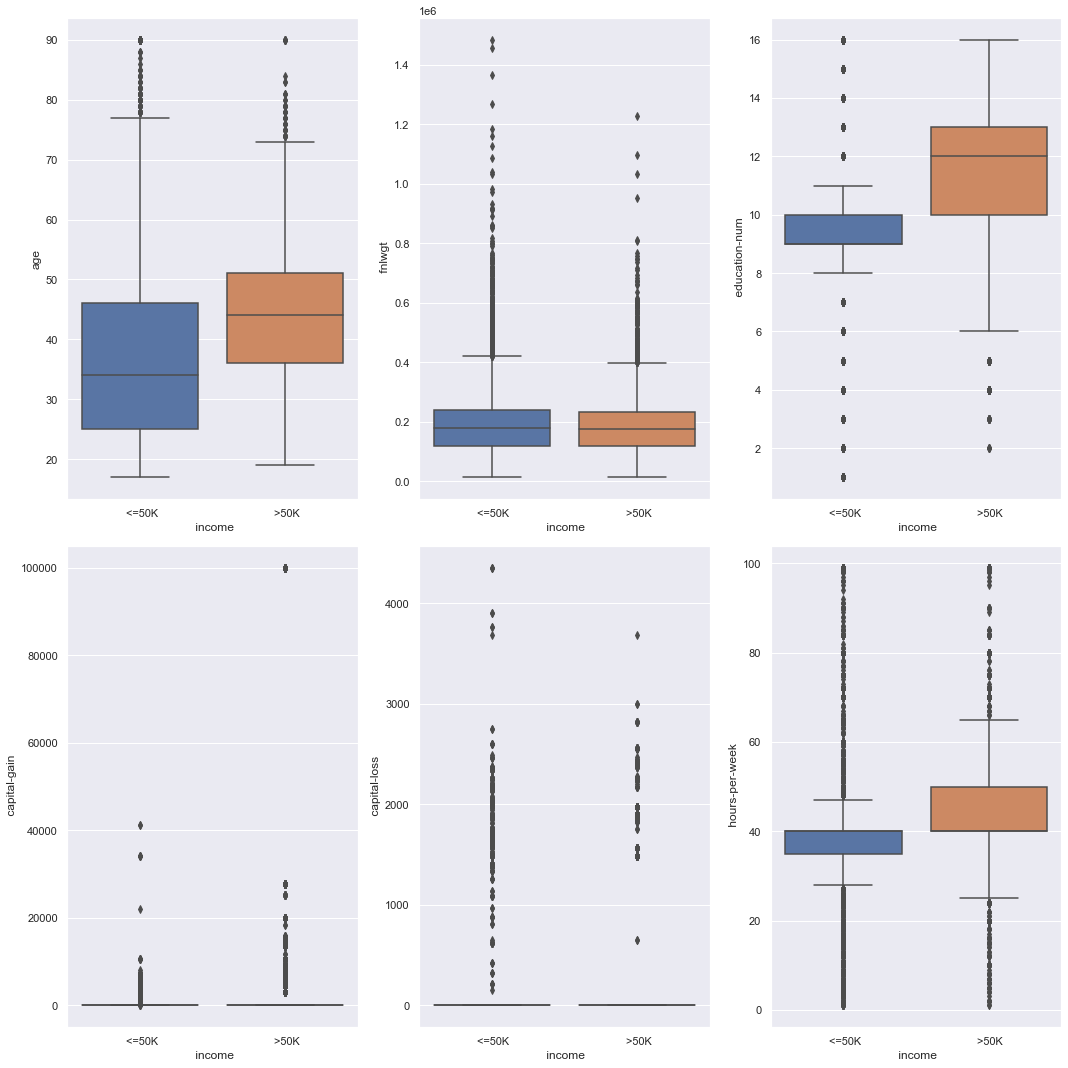

In [35]:
'''This code creates a figure with a 2x3 grid of subplots using plt.subplots().
    It then flattens the axs array for easier iteration.
    The for loop iterates over the numerical_cols list, and for each variable,
    it creates a box plot using sns.boxplot(). The 'income' variable is plotted on the x-axis and
    the respective numerical variable from numerical_cols is plotted on the y-axis.
    The resulting box plots are displayed using plt.show().'''

numerical_cols = ['age', ' fnlwgt', ' education-num', ' capital-gain',
            ' capital-loss', ' hours-per-week']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

for i, var in enumerate(numerical_cols):
    sns.boxplot(y=var, x=' income', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

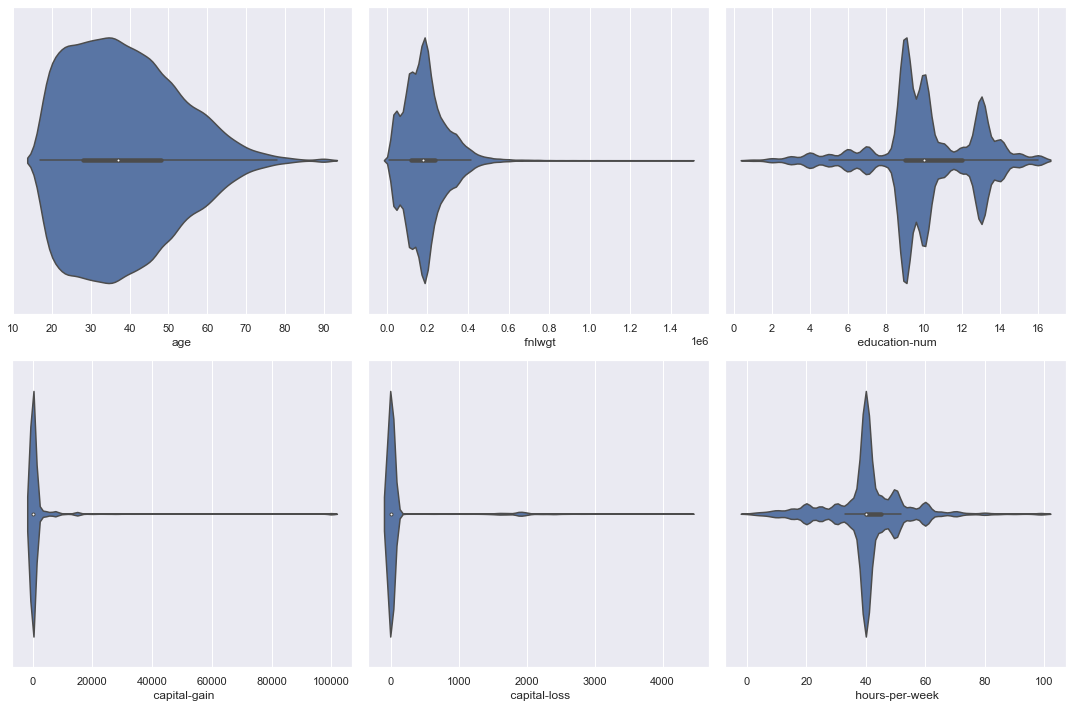

In [36]:
'''This code creates a figure with a 2x3 grid of subplots using plt.subplots(). 
    It then flattens the axs array for easier iteration. The for loop iterates over the numerical_cols list, 
    and for each variable, it creates a violin plot using sns.violinplot().
    The resulting violin plots are displayed using plt.show().'''

numerical_cols = ['age', ' fnlwgt', ' education-num', ' capital-gain',
            ' capital-loss', ' hours-per-week']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, var in enumerate(numerical_cols):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

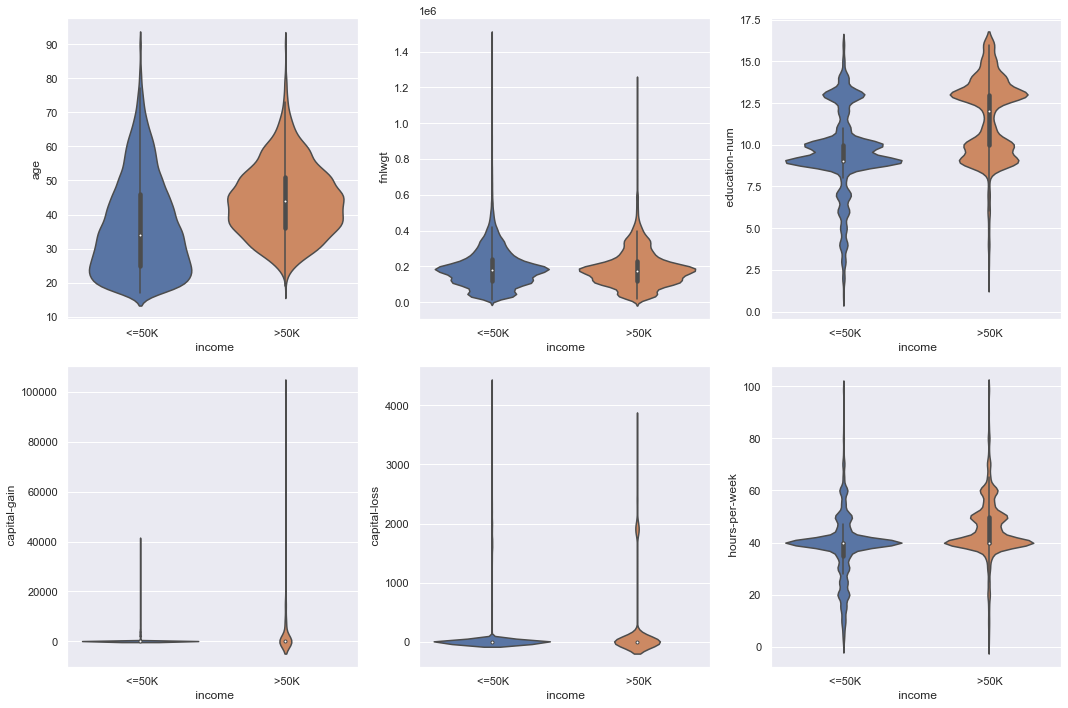

In [37]:
'''This code creates a figure with a 2x3 grid of subplots using plt.subplots().
    It then flattens the axs array for easier iteration.
    The for loop iterates over the numerical_cols list, and for each variable,
    it creates a violin plot using sns.violinplot().
    The 'income' variable is plotted on the x-axis using x='income', and the respective 
    numerical variable from numerical_cols is plotted on the y-axis using y=var.
    The resulting violin plots are displayed using plt.show().'''


numerical_cols = ['age', ' fnlwgt', ' education-num', ' capital-gain',
            ' capital-loss', ' hours-per-week']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, var in enumerate(numerical_cols):
    sns.violinplot(y=var, data=df, x=' income', ax=axs[i])

fig.tight_layout()

plt.show()

In [38]:
'''This code calculates the percentage of missing values for each column in the DataFrame by 
    dividing the sum of missing values by the total number of rows (df.shape[0]). The result is stored in
    the check_missing Series.

    The next line filters the check_missing Series to include only the columns with missing values 
    (check_missing > 0) and sorts them in descending order using sort_values(ascending=False). 
    This will give you the percentage of missing values for each column, with the columns having
    the highest missing values listed first.'''

#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [39]:
''' This code uses the select_dtypes() function to filter columns based on their data types. 
    By passing include=['object'], it selects only the columns with an 'object' data type 
    (typically representing categorical variables).

    Inside the loop, it prints the column name (col) along with its unique values using 
    f-string formatting (f"{col}: {df[col].unique()}").'''


for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

 workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 education: ['Higher Education' 'High School or Some College' 'High School Dropout'
 'Other' 'School Dropout']
 marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 occupation: ['Administrative/Managerial' 'Service' 'Professional/Technical' 'Sales'
 'Skilled Labor' 'Farming/Fishing' 'Unknown/Military'
 'Protective Services']
 relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 sex: [' Male' ' Female']
 native-country: ['North America' 'Central America/Caribbean' 'Asia' 'Other' 'Europe'
 'Southeast Asia' 'Balkans' 'US Territories']
 income: [' <=50K' ' >50K']


In [40]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

 workclass: [7 6 4 1 2 0 5 8 3]
 education: [2 1 0 3 4]
 marital-status: [4 2 0 3 5 1 6]
 occupation: [0 5 2 4 6 1 7 3]
 relationship: [1 0 5 3 4 2]
 race: [4 2 1 0 3]
 sex: [1 0]
 native-country: [4 2 0 5 3 6 1 7]
 income: [0 1]


<AxesSubplot:>

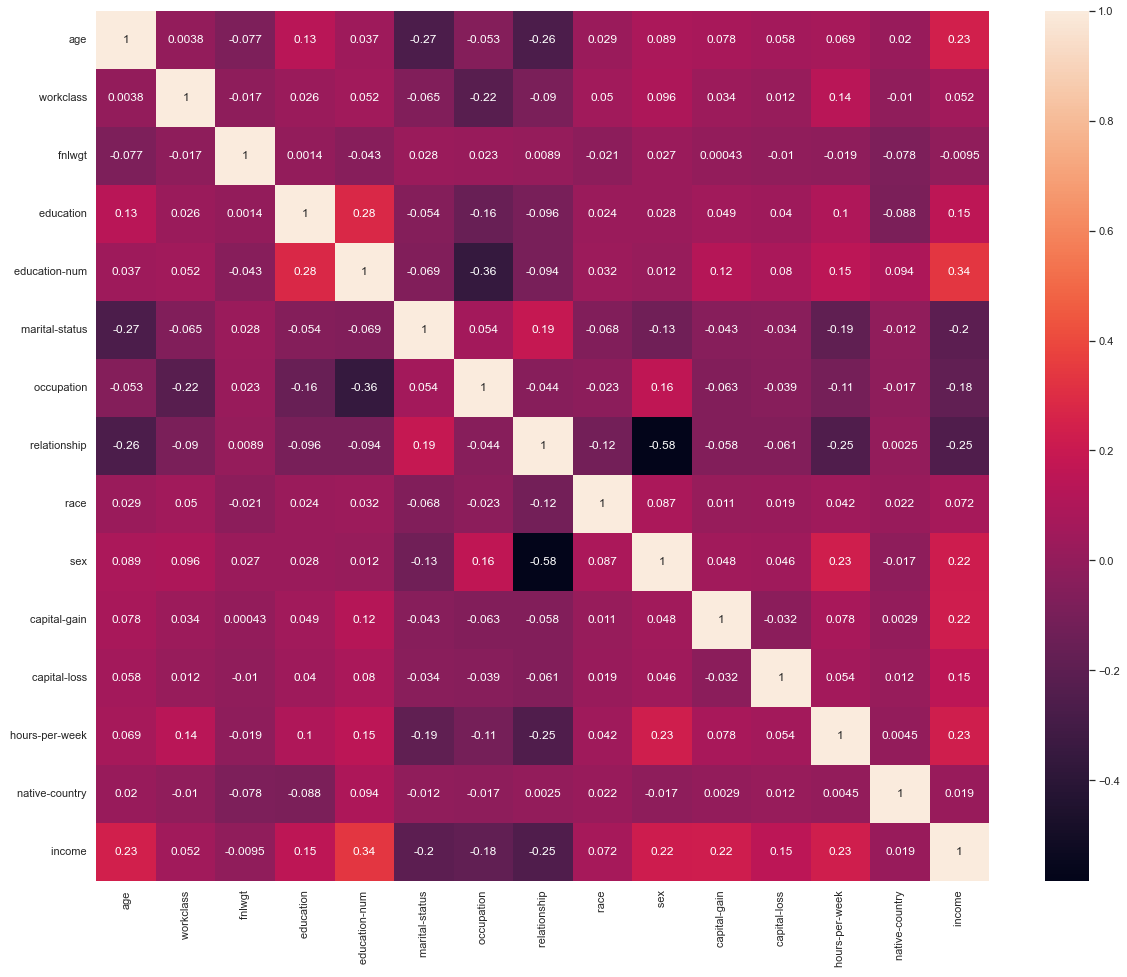

In [41]:
'''This code sets the figure size to (20, 16) using plt.figure(figsize=(20, 16)). 
    Then, it uses sns.heatmap() to create the heatmap. The df.corr() function calculates 
    the correlation matrix for the DataFrame, and sns.heatmap() visualizes the matrix as a heatmap.

    The fmt='.2g' argument formats the values in the heatmap with two decimal places using scientific 
    notation if necessary. The annot=True argument displays the correlation values as annotations on the heatmap.'''

plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

## THANK YOU
